# Visualization

In [29]:
import matplotlib.pyplot as plt
import numpy as np

def plot_layer(activations, sample, layer, num_columns):
    a = activations[layer].shape
    rows = int(a[3]/num_columns)
    fig, axarr = plt.subplots(rows, num_columns, figsize=[4*num_columns,8])
    for i in range(a[3]):
        row = int(i/num_columns)
        x, y = row, i-num_columns*row
        axarr[x, y].imshow(activations[layer][sample, :, :, i], cmap='gray')
        axarr[x, y].set_xticks([])
        axarr[x, y].set_yticks([])
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0)
    fig.tight_layout()

In [19]:
DATA_FOLDER = '../python/data/'

FILES = 172
TRAINING_FILES = 120
TEST_FILES = FILES - TRAINING_FILES

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import time
import random
import os
import sklearn.preprocessing as pp

In [7]:
import glob

data_files = glob.glob(DATA_FOLDER+'*.csv')
class_labels = []

for file in data_files:
    label = file.split('-')[0].replace('\\', '/').split('/')[-1]
    if label not in class_labels:
        class_labels.append(label)

data_set = {}

class_number = 0

for label in class_labels:
    files = glob.glob(DATA_FOLDER+'{}-*.csv'.format(label))
    random.shuffle(files)
    data_set[label] = (files[:TRAINING_FILES], files[TRAINING_FILES:FILES], class_number)
    class_number += 1

training_set = []
test_set = []

for k, v in data_set.items():
    files = v[0]
    class_number = v[2]
    for file in files:
        with open(file) as f:
            data = np.array(f.read().split(',')).astype(float)
            training_set.append((pp.minmax_scale(data), class_number))
    files = v[1]
    for file in files:
        with open(file) as f:
            data = np.array(f.read().split(',')).astype(float)
            test_set.append((pp.minmax_scale(data), class_number))
random.shuffle(training_set)
random.shuffle(test_set)

class_labels = [None for _ in range(len(data_set))]

# Class number and class labels
for k,v in data_set.items():
    print('{}: {}'.format(v[2],k))
    class_labels[v[2]] = k
    
import yaml
with open(DATA_FOLDER+'class_labels.yaml', 'w') as f:
    yaml.dump(class_labels, f)

0: paper
1: rock
2: scissors


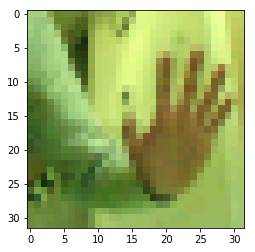

In [8]:
train_data, train_labels = [], []
test_data, test_labels = [], []
for img, label in training_set:
    train_data.append(img)
    train_labels.append(label)
for img, label in test_set:
    test_data.append(img)
    test_labels.append(label)
train_data = np.array(train_data).reshape((TRAINING_FILES*len(class_labels), 32, 32, 3))
train_labels = np.array(train_labels, dtype='uint8')
test_data = np.array(test_data).reshape((TEST_FILES*len(class_labels), 32, 32, 3))
test_lables = np.array(test_labels, dtype='uint8')
#train_data.shape

from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

plt.imshow(train_data[12,:,:,:])
#train_data[12,:,:,0]

In [9]:
from keras import layers
from keras import models

SAVED_FILE = './rock_paper_scissors_cnn_20190226052228.h5'
model = models.load_model(SAVED_FILE)

'scissors'

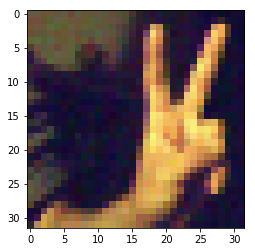

In [121]:
image_number = 36

plt.imshow(test_data[image_number,:,:,:])
plt.savefig('input.png')
class_labels[np.argmax(test_labels[image_number])]

In [122]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)

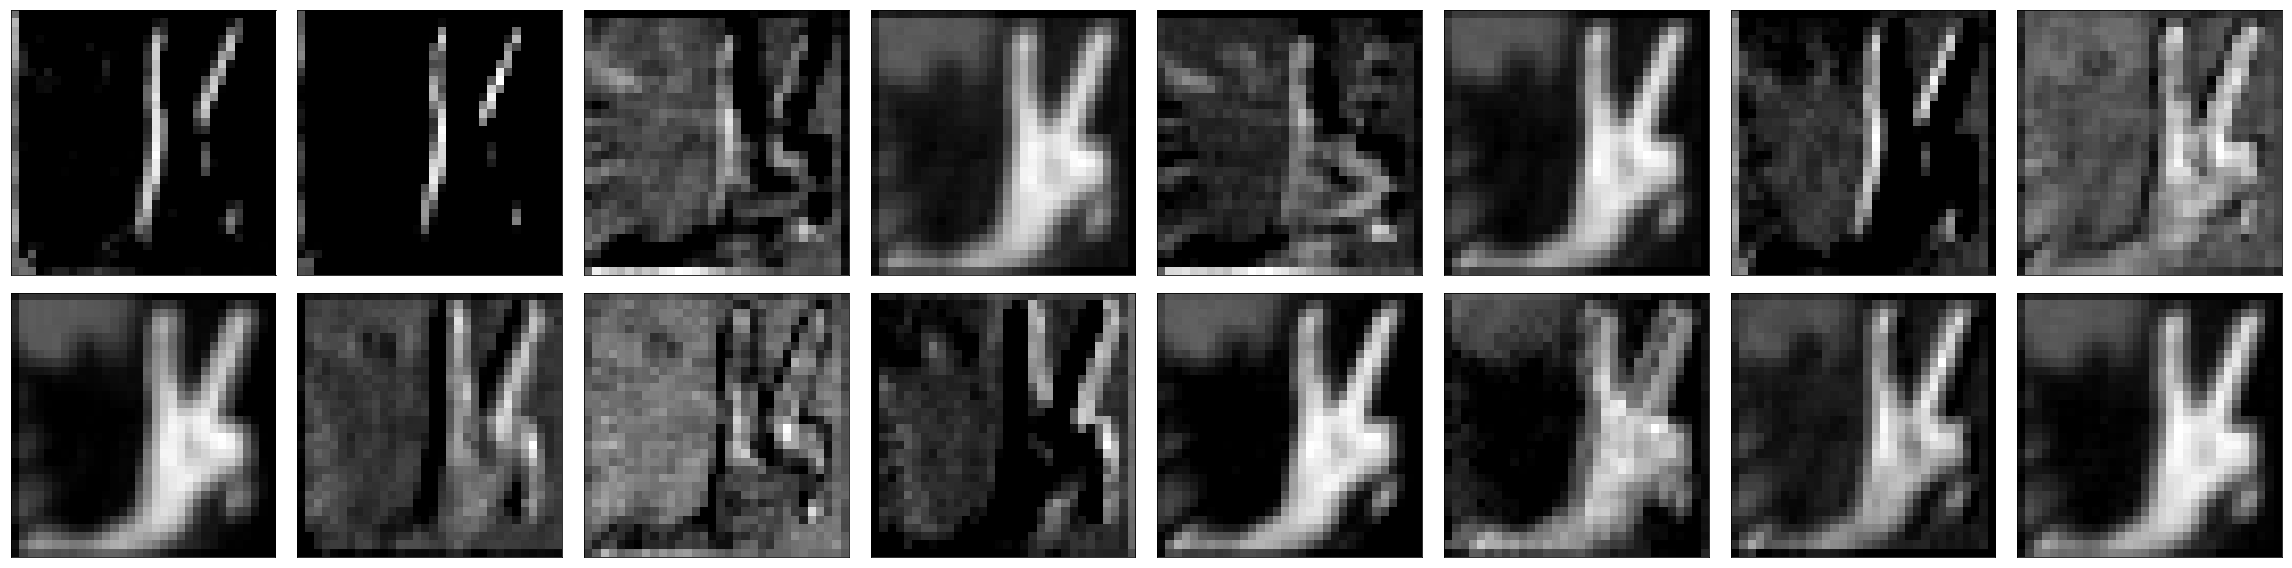

In [123]:
plot_layer(activations, image_number, 0, 8)
plt.savefig('layer0.png')

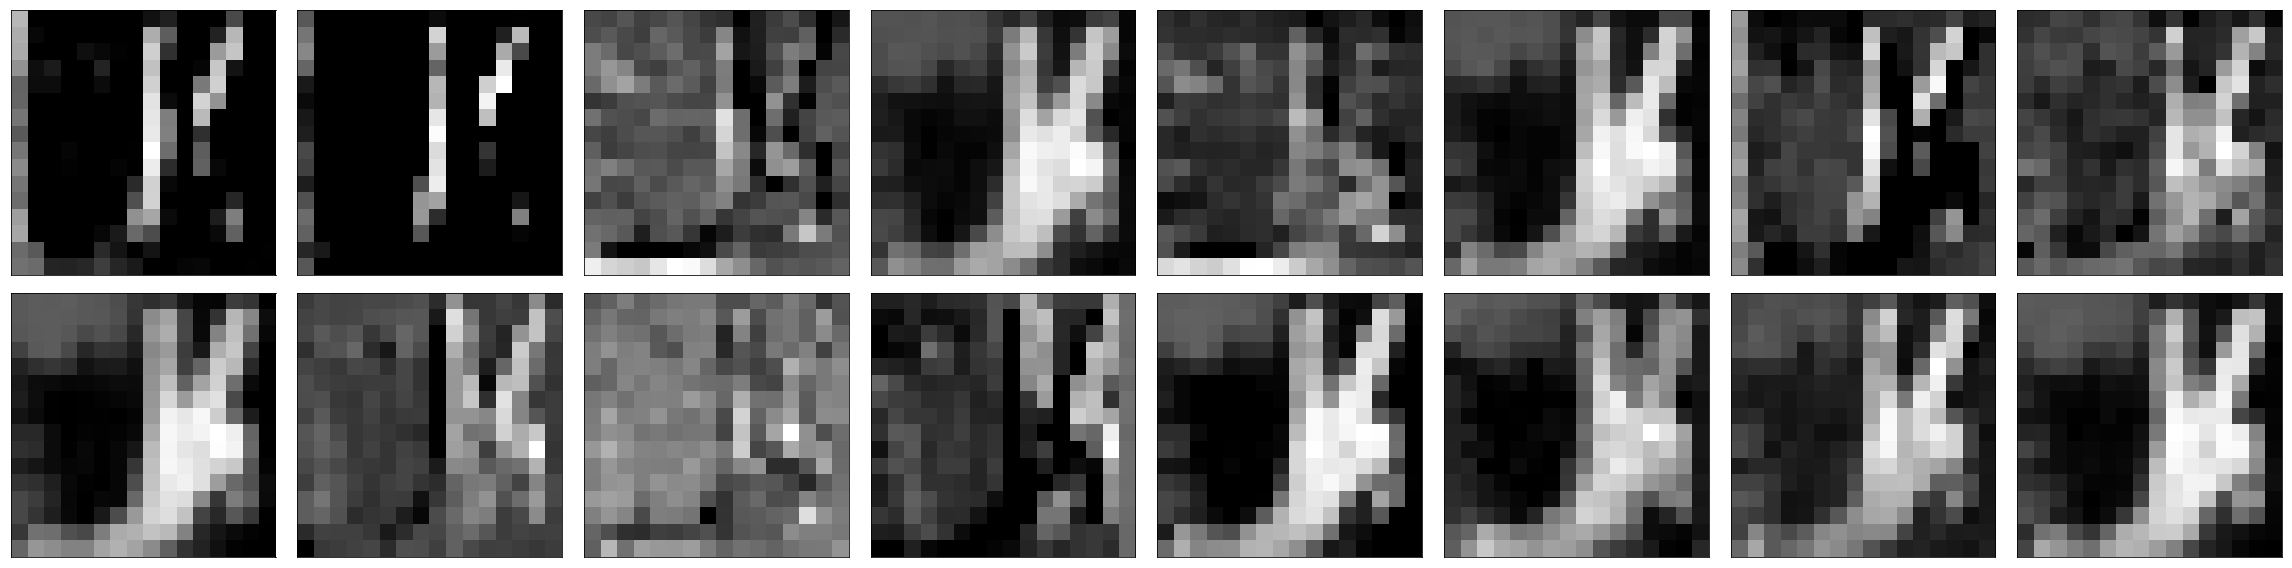

In [124]:
plot_layer(activations, image_number, 1, 8)
plt.savefig('layer1.png')

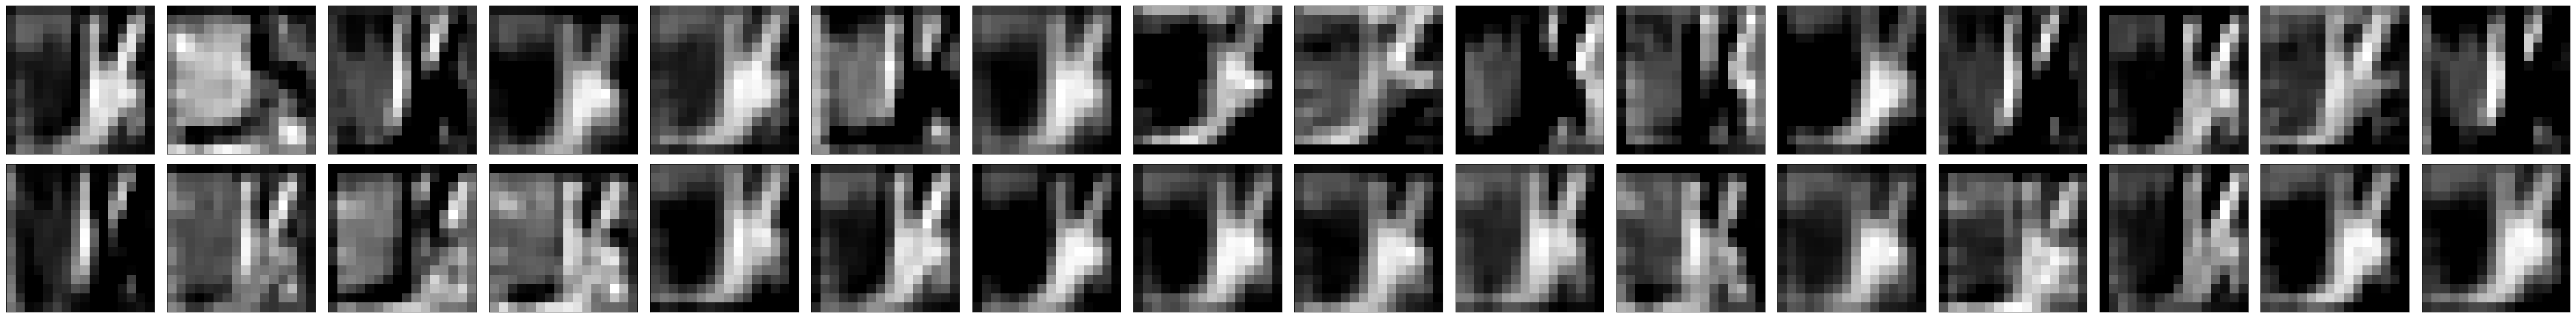

In [125]:
plot_layer(activations, image_number, 3, 16)
plt.savefig('layer3.png')

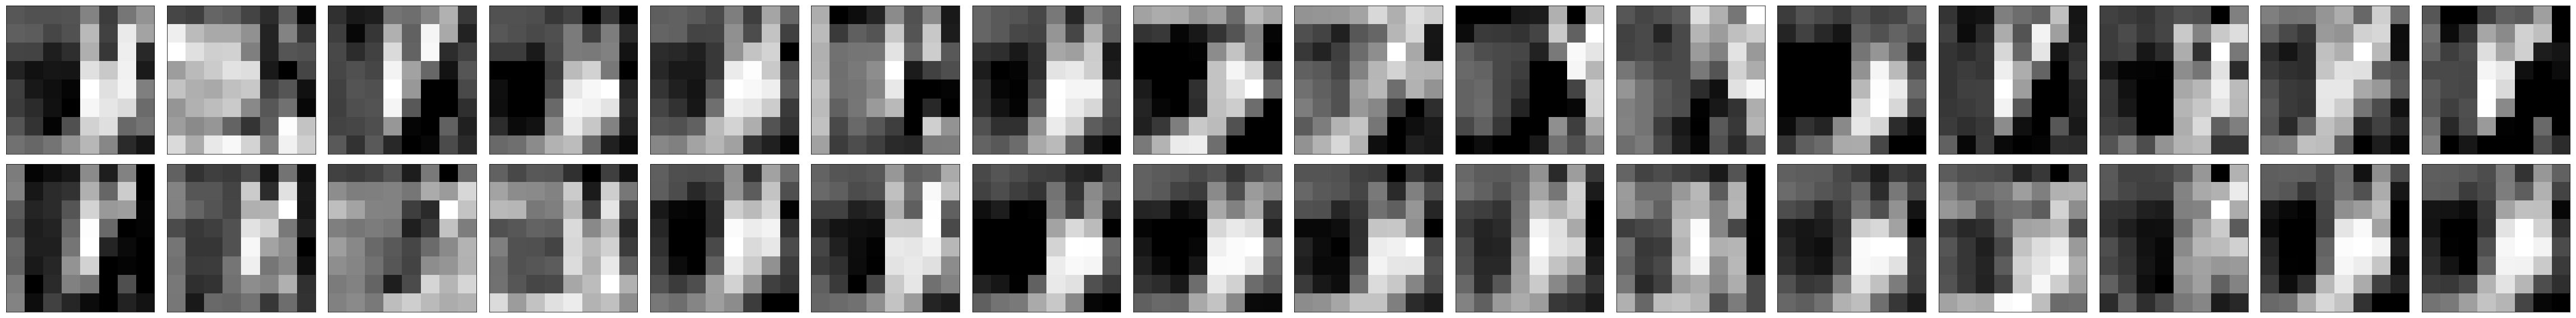

In [126]:
plot_layer(activations, image_number, 4, 16)
plt.savefig('layer4.png')

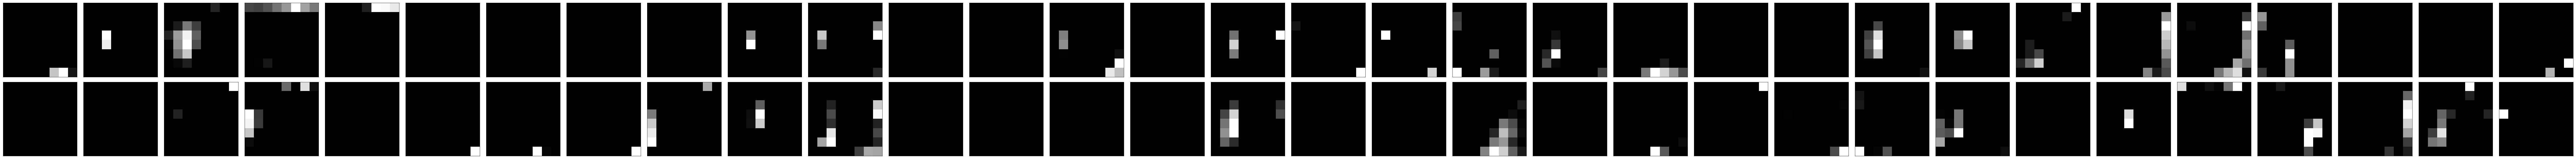

In [127]:
plot_layer(activations, image_number, 6, 32)
plt.savefig('layer6.png')

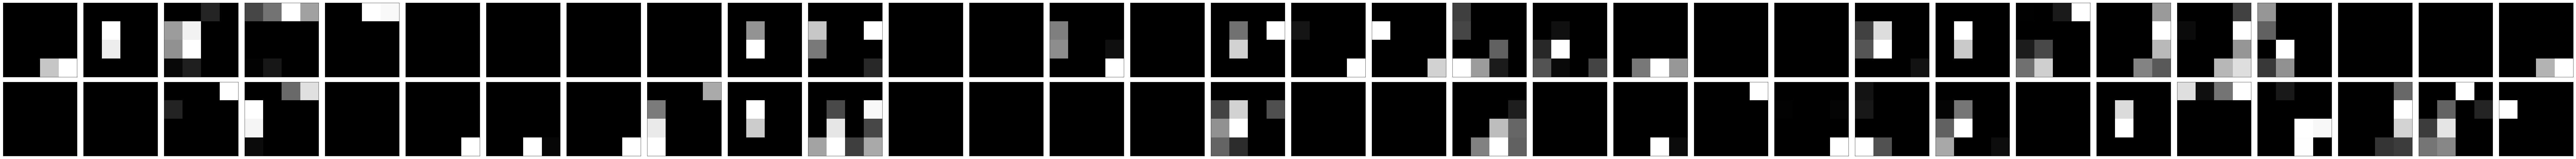

In [128]:
plot_layer(activations, image_number, 7, 32)
plt.savefig('layer7.png')